# 7. Feature Selection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./dataset/train_ts_feature_added.csv')
df_train['datetime_iso'] = pd.to_datetime(df_train['datetime_iso'])

df_test = pd.read_csv('./dataset/test_ts_feature_added.csv')
df_test['datetime_iso'] = pd.to_datetime(df_test['datetime_iso'])

In [3]:
df_train = df_train.drop(['datetime_iso'],axis = 1)
df_test = df_test.drop(['datetime_iso'],axis = 1)

## Correlation Analysis

<Figure size 1200x800 with 0 Axes>

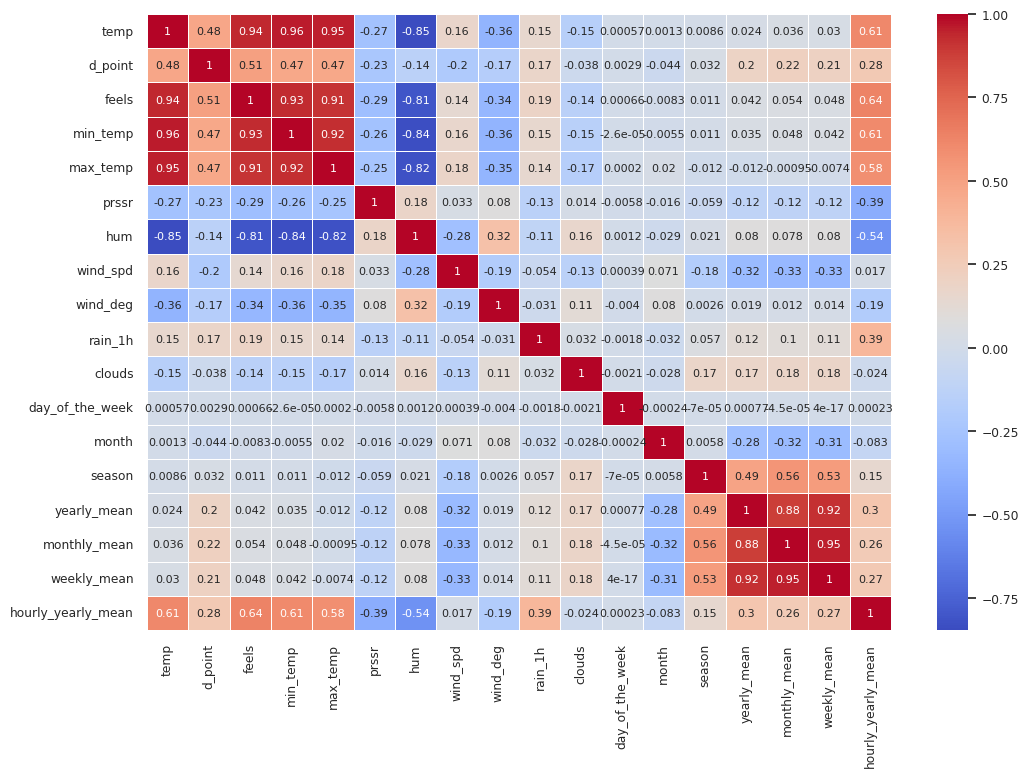

In [7]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Customize the heatmap appearance and font size
sns.set(font_scale=0.8)  # Adjust the font scale as needed
sns.set_style("whitegrid")

# Create the heatmap with smaller annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
            annot_kws={"size": 8})  # Adjust the "size" parameter for the font size

# Show the plot
plt.show()

## Feature Selection with Pearson Correlation

### Coba drop day_of_the_week deh

In [5]:
df_train.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,day_of_the_week,month,season,yearly_mean,monthly_mean,weekly_mean,hourly_yearly_mean
0,24.75,23.89,25.76,24.28,25.22,1012.0,95.0,0.82,320.0,0.00,100.0,0,1,1,0.492286,0.442561,0.485107,0.061282
1,24.58,23.73,25.57,23.99,25.26,1012.0,95.0,0.96,338.0,0.00,100.0,0,1,1,0.492286,0.442561,0.485107,0.042564
2,26.60,24.06,26.60,26.10,27.39,1012.0,86.0,1.22,339.0,0.00,99.0,0,1,1,0.492286,0.442561,0.485107,0.091538
3,27.31,24.37,30.90,26.59,28.36,1012.0,84.0,1.08,342.0,0.13,94.0,0,1,1,0.492286,0.442561,0.485107,0.257179
4,27.41,25.05,31.54,26.58,28.31,1011.0,87.0,0.86,336.0,0.34,100.0,0,1,1,0.492286,0.442561,0.485107,0.718974


In [6]:
df_train_dotw = df_train.drop(['day_of_the_week','lag_rain_1h_6_years_date'],axis = 1)
df_test_dotw = df_train.drop(['day_of_the_week','lag_rain_1h_6_years_date'],axis = 1)

KeyError: "['lag_rain_1h_6_years_date'] not found in axis"

In [ ]:
from pycaret.regression import *
s = setup(df_train_dotw, target = 'rain_1h', session_id = 42)

In [ ]:
catboost = create_model('catboost')